In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

import matplotlib.pyplot as plt
import operator

In [2]:
name=[]
link=[]
for i in range(1,9):
    page = requests.get("https://www.imdb.com/title/tt0944947/episodes?season="+str(i))
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()
        for eachEpisode in soup.findAll('a', attrs={'itemprop':["name"]}):
            name.append(eachEpisode.get_text())
            link.append(eachEpisode['href'])
print(len(name))
print(link)

73
['/title/tt1480055/', '/title/tt1668746/', '/title/tt1829962/', '/title/tt1829963/', '/title/tt1829964/', '/title/tt1837862/', '/title/tt1837863/', '/title/tt1837864/', '/title/tt1851398/', '/title/tt1851397/', '/title/tt1971833/', '/title/tt2069318/', '/title/tt2070135/', '/title/tt2069319/', '/title/tt2074658/', '/title/tt2085238/', '/title/tt2085239/', '/title/tt2085240/', '/title/tt2084342/', '/title/tt2112510/', '/title/tt2178782/', '/title/tt2178772/', '/title/tt2178802/', '/title/tt2178798/', '/title/tt2178788/', '/title/tt2178812/', '/title/tt2178814/', '/title/tt2178806/', '/title/tt2178784/', '/title/tt2178796/', '/title/tt2816136/', '/title/tt2832378/', '/title/tt2972426/', '/title/tt2972428/', '/title/tt3060856/', '/title/tt3060910/', '/title/tt3060876/', '/title/tt3060782/', '/title/tt3060858/', '/title/tt3060860/', '/title/tt3658012/', '/title/tt3846626/', '/title/tt3866836/', '/title/tt3866838/', '/title/tt3866840/', '/title/tt3866842/', '/title/tt3866846/', '/title/t

In [3]:
data=[]
for i in range(len(name)):
    #print(z)
    sublink="https://www.imdb.com"+link[i]
    page = requests.get(sublink)
    #page = requests.get("https://www.imdb.com/title/tt1480055/?ref_=ttep_ep1")
    if page.status_code==200: 
        soup = BeautifulSoup(page.content, 'html.parser')
        soup.prettify()

        title=soup.find('div', attrs={'class':["titleBar"]}).find("h1").get_text().strip()
        #print(title)
        
        #director=soup.find('div', attrs={'class':["credit_summary_item"]}).find('a').get_text()
        #print(director)
        directorArrays=[]
        director=soup.find('div', attrs={'class':["credit_summary_item"]}).findAll('a')
        for x in director:
            directorArrays.append(x.get_text())
            
        rating=soup.find('div', attrs={'class':["imdbRating"]}).find("strong").get_text()
        #print(rating)
        
        airdate=soup.find('div', attrs={'class':["subtext"]}).find('a', title="See more release dates").get_text().strip()
        #print(airdate)
        
        season_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[0].strip()
        #print(season_number)
        
        episode_number=soup.find('div', attrs={'class':["bp_heading"]}).get_text().split('|')[1].strip()
        #print(episode_number)
        
        storyline=soup.find('div', attrs={'class':["inline canwrap"]}).find('span').get_text().strip()
        #print(storyline)

        #Genres
        p=soup.find('div', attrs={'class':["see-more inline canwrap"]}).find('h4').get_text()
        if p=='Plot Keywords:':
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[1].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())
            #print(genres)
        else:
            genresAnchors=soup.findAll('div', attrs={'class':["see-more inline canwrap"]})[0].findAll('a')
            genres=[]
            for a in genresAnchors:
                genres.append(a.get_text())

        #Cast
        cast=soup.find('table', attrs={'class':["cast_list"]}).findAll('tr', attrs={'class':["odd","even"]})
        castArrays=[]
        for each in cast:
            castArrays.append(each.get_text().split("\n")[4][1:])
        #print(castArrays)

        #Character
        characterArrays=[]
        character=soup.findAll('td', attrs={'class':["character"]})
        for x in character:
            characterArrays.append(x.get_text().split('\n')[1].strip())
        #print(characterArrays)
        data.append((title, directorArrays, rating, airdate, season_number, episode_number, storyline, genres, castArrays, characterArrays))
        #print('\n')
#print(data)

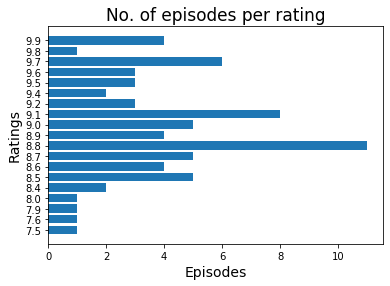

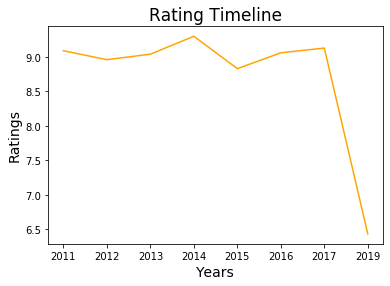

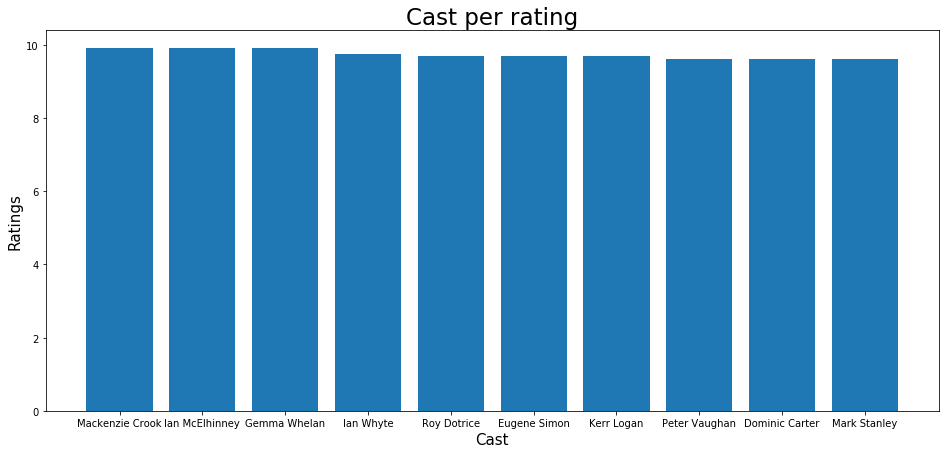

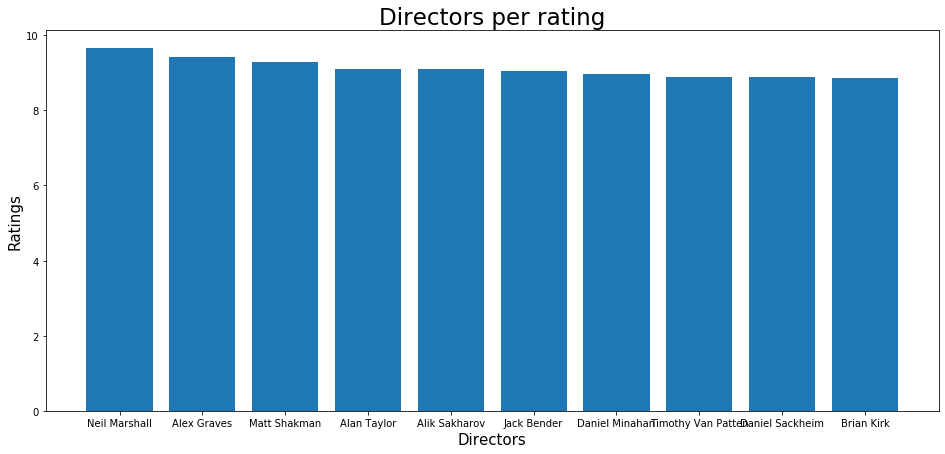

In [4]:
got_series = pd.DataFrame(data, columns = ['title', 'director', 'rating', 'airdate', 'season_number', 'episode_number', 'storyline', 'genres', 'cast', 'character'])
# got_series
# got_series.to_csv(r'C:\Users\Heda\OneDrive\Desktop\BIA 660\Project\GOT.csv')


# ***********************************************************************************

# seasonNumber = ""
# ratingCount = 0
# totalCount = 0
# average=[]
# seasonNumberWord=[]

# i = 0
# while i<len(got_series['season_number']):
#     seasonNumber = got_series['season_number'][i]
#     ratingCount = 0
#     totalCount = 0
    
#     for index in range(0, len(got_series)):
#         if(seasonNumber == got_series['season_number'][index]):
#             ratingCount+=float(got_series['rating'][index])
#             totalCount+=1
#             i+=1

#     seasonNumberWord.append(seasonNumber)
#     average.append(ratingCount/totalCount)


# mydf = pd.DataFrame({
#         'rating': average,
#         'Seasons': seasonNumberWord
#     })
# ax = plt.gca()

# mydf.plot(kind='bar',x='Seasons',y='rating',legend=False, ax=ax)
# ax.set_xlabel("rating")
# ax.set_ylabel("Seasons")
# ax.set_title('Average rating per episodes')



# ************************* No. of Episodes per rating bar graph ***************************************

myRating =[]
# myRating = [round(float(x)) for x in got_series['rating']]
myRating = [float(x) for x in got_series['rating']]
# print(myRating)

myRating2 = []
for a in myRating:
    if a>=7:
        myRating2.append(a)
        
# my_dict_Count = {i:myRating.count(i) for i in myRating}
my_dict_Count = {i:myRating2.count(i) for i in myRating2}



# for i in range(0,10):
#     if i+1 not in my_dict_Count:
#         my_dict_Count[i+1] = 0

# print(my_dict_Count)
mySorted = {}

for key in sorted(my_dict_Count.keys()):
    mySorted[key] = my_dict_Count[key]

# print(mySorted)
plt.barh(range(len(mySorted)), mySorted.values(), align='center')
plt.yticks(range(len(mySorted)), mySorted.keys())
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('No. of episodes per rating', fontsize=17)

plt.show()





# ************************* Rating TimeLine ***************************************

years = []
for index in range(0, len(got_series)):
    if got_series['airdate'][index].split()[4] not in years:
        years.append(got_series['airdate'][index].split()[4])

seasonNumber = ""
ratingCount = 0
totalCount = 0
average=[]
# seasonNumberWord=[]
i = 0
while i<len(got_series['season_number']):
    seasonNumber = got_series['season_number'][i]
    ratingCount = 0
    totalCount = 0
    
    for index in range(0, len(got_series)):
        if(seasonNumber == got_series['season_number'][index]):
            ratingCount+=float(got_series['rating'][index])
            totalCount+=1
            i+=1

#     seasonNumberWord.append(seasonNumber)
    average.append(ratingCount/totalCount)
    

plt.plot(years, average, color='orange')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('Rating Timeline', fontsize=17)
plt.show()


# ************************* Cast average Rating ***************************************
castArray = []

for j in range(0, len(got_series)):
    for i in range(0, len(got_series['cast'][j])):
        if got_series['cast'][j][i] not in castArray:
            castArray.append(got_series['cast'][j][i])

castRating = 0
totalCastRating = 0
castRatingArray = []
topCastRating = {}
topCastRating1 = {}

for k in range(0, len(castArray)):
    
    castRating = 0
    totalCastRating = 0
    
    for l in range(0, len(got_series)):
        if castArray[k] in got_series['cast'][l]:
            castRating+=float(got_series['rating'][l])
            totalCastRating+=1
    topCastRating[castArray[k]] = castRating/totalCastRating
    castRatingArray.append(castRating/totalCastRating)


for r in sorted(topCastRating, key=topCastRating.get, reverse=True)[:10]:
    topCastRating1[r] = topCastRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topCastRating1.items()))
plt.xlabel('Cast', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Cast per rating', fontsize=23)
plt.show()



# ************************* Director average Rating ***************************************
directorArray = []

for j in range(0, len(got_series)):
#     print('Anna Fleix' in bb_series['Director'][j])
    for i in range(0, len(got_series['director'][j])):
        if got_series['director'][j][i] not in directorArray:
            directorArray.append(got_series['director'][j][i])


directorRating = 0
totalDirectorRating = 0
directorRatingArray = []
topDirectorRating = {}
topDirectorRating1 = {}

for k in range(0, len(directorArray)):
    
    directorRating = 0
    totalDirectorRating = 0
    
    for l in range(0, len(got_series)):
        if directorArray[k] in got_series['director'][l]:
            directorRating+=float(got_series['rating'][l])
            totalDirectorRating+=1
    topDirectorRating[directorArray[k]] = directorRating/totalDirectorRating
    directorRatingArray.append(directorRating/totalDirectorRating)


for r in sorted(topDirectorRating, key=topDirectorRating.get, reverse=True)[:10]:
    topDirectorRating1[r] = topDirectorRating[r]


fig = plt.figure(figsize=(16,7))
plt.bar(*zip(*topDirectorRating1.items()))
plt.xlabel('Directors', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Directors per rating', fontsize=23)
plt.show()




In [5]:
#text preprocessing
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
preprocessed = []
for paragraph in got_series['storyline']:
    paragraph = paragraph.lower()   
    translator = str.maketrans('', '', string.punctuation) 
    paragraph = paragraph.translate(translator) 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(paragraph) 
    text = [word for word in word_tokens if word not in stop_words]
    preprocessed.append(text)

[nltk_data] Downloading package stopwords to /home/manas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/manas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
got_series['tokens']=preprocessed
got_series.head

<bound method NDFrame.head of                                     title                     director rating  \
0                        Winter Is Coming         [Timothy Van Patten]    9.0   
1                           The Kingsroad         [Timothy Van Patten]    8.8   
2                               Lord Snow                 [Brian Kirk]    8.7   
3   Cripples, Bastards, and Broken Things                 [Brian Kirk]    8.8   
4                   The Wolf and the Lion                 [Brian Kirk]    9.1   
..                                    ...                          ...    ...   
68         A Knight of the Seven Kingdoms               [David Nutter]    7.9   
69                         The Long Night           [Miguel Sapochnik]    7.5   
70                 The Last of the Starks               [David Nutter]    5.5   
71                              The Bells           [Miguel Sapochnik]    6.0   
72                        The Iron Throne  [David Benioff, D.B. Weiss]    4.1  

In [7]:
from wordcloud import WordCloud
def create_word_cloud(tokens):
    word_cloud_collection=''
    for i in tokens:
        for words in i:
            word_cloud_collection = word_cloud_collection + words + ' '

    wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

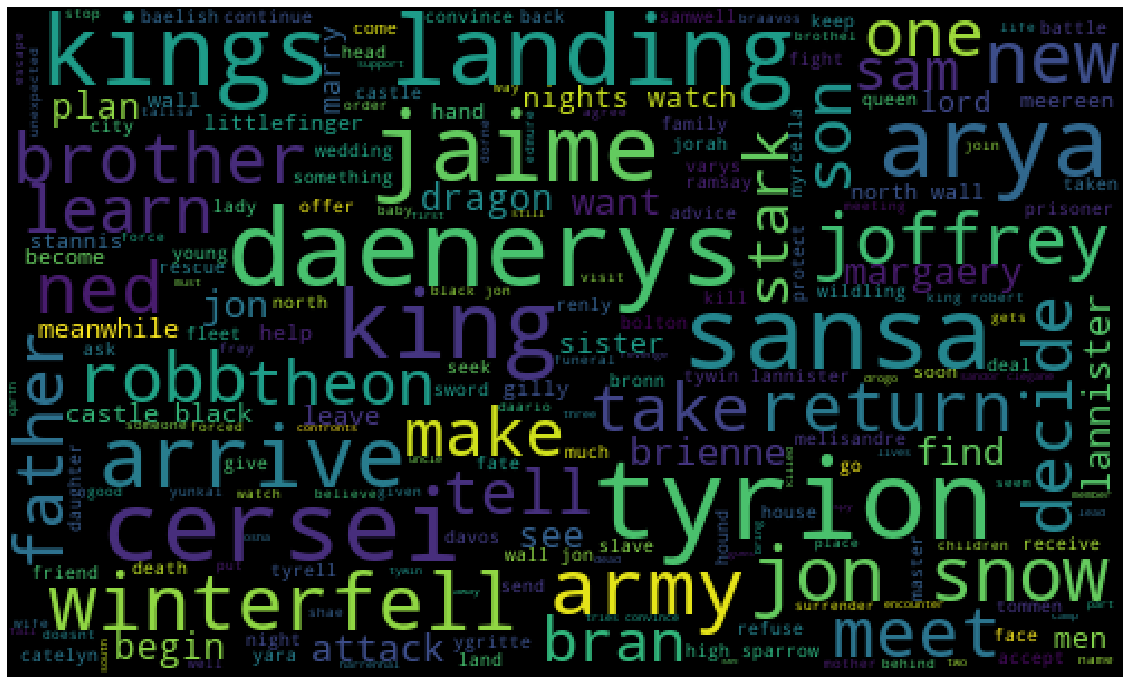

In [8]:
create_word_cloud(got_series['tokens'])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim 
from gensim.models import Word2Vec
f=[]
for i in got_series['tokens']:
    s = " ".join(i)
    f.append(s)
# list of text documents
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(f)
# summarize
vects = vectorizer.transform(f)

print(vectorizer.vocabulary_)

{'castle': 246, 'winterfell': 1673, 'lord': 864, 'ned': 977, 'stark': 1418, 'begins': 159, 'believe': 163, 'something': 1387, 'amiss': 60, 'deserter': 406, 'night': 996, 'watch': 1643, 'guardians': 661, 'giant': 625, 'ice': 715, 'wall': 1632, 'northern': 1004, 'boundary': 198, 'territory': 1497, 'says': 1302, 'hes': 691, 'seen': 1322, 'white': 1660, 'walkers': 1630, 'later': 829, 'sons': 1390, 'find': 574, 'animals': 64, 'slain': 1369, 'woods': 1687, 'including': 732, 'shewolf': 1349, 'whose': 1662, 'six': 1368, 'pups': 1124, 'keep': 794, 'one': 1020, 'neds': 978, 'children': 271, 'also': 54, 'welcome': 1653, 'arrival': 90, 'good': 643, 'friend': 607, 'king': 804, 'robert': 1262, 'betrothed': 173, 'sister': 1364, 'killed': 799, 'could': 333, 'marry': 906, 'wed': 1651, 'cersei': 257, 'lannister': 824, 'given': 633, 'son': 1389, 'joffrey': 778, 'along': 52, 'cerseis': 258, 'two': 1564, 'brothers': 218, 'handsome': 667, 'jaime': 768, 'tyrion': 1567, 'dwarf': 471, 'large': 826, 'appetites'

In [10]:
got_series.shape

(73, 11)

In [11]:
print(vects)

  (0, 12)	1
  (0, 15)	1
  (0, 21)	1
  (0, 52)	1
  (0, 54)	1
  (0, 60)	1
  (0, 64)	1
  (0, 74)	1
  (0, 83)	1
  (0, 90)	1
  (0, 113)	1
  (0, 153)	1
  (0, 159)	1
  (0, 163)	1
  (0, 173)	1
  (0, 198)	1
  (0, 204)	1
  (0, 218)	1
  (0, 235)	1
  (0, 246)	1
  (0, 257)	1
  (0, 258)	1
  (0, 271)	1
  (0, 333)	1
  (0, 406)	1
  :	:
  (70, 940)	1
  (70, 1171)	1
  (70, 1267)	1
  (70, 1292)	1
  (70, 1313)	1
  (70, 1457)	1
  (70, 1473)	1
  (70, 1489)	1
  (70, 1530)	1
  (70, 1673)	1
  (71, 92)	1
  (71, 148)	1
  (71, 570)	1
  (71, 588)	1
  (71, 807)	1
  (71, 821)	1
  (72, 34)	1
  (72, 113)	1
  (72, 357)	1
  (72, 414)	1
  (72, 543)	1
  (72, 807)	1
  (72, 821)	1
  (72, 963)	1
  (72, 1464)	1


In [12]:

from keras.preprocessing import text
from keras.preprocessing import sequence
from keras.utils import to_categorical


X_train, X_test, y_train, y_test = got_series['storyline'][:50],got_series['storyline'][50:],got_series['rating'][:50],got_series['rating'][50:]

tokenizer = text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=1000)
X_test = sequence.pad_sequences(X_test, maxlen=1000)

Using TensorFlow backend.
/home/manas/anaconda3/envs/PythonGPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/manas/anaconda3/envs/PythonGPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/manas/anaconda3/envs/PythonGPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/manas/an

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

rfc = RandomForestRegressor(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
scores = cross_val_score(rfc, X_test, y_test, cv=10)

In [14]:
print(y_test)

50    8.5
51    9.4
52    8.7
53    9.1
54    9.7
55    8.4
56    8.6
57    8.4
58    9.9
59    9.9
60    8.6
61    8.9
62    9.2
63    9.8
64    8.8
65    9.1
66    9.5
67    7.6
68    7.9
69    7.5
70    5.5
71    6.0
72    4.1
Name: rating, dtype: object


In [15]:
for i in range(len(rfc_pred)):
    print(y_test.iloc[i],"  ",rfc_pred[i])

8.5    9.263500000000002
9.4    9.213500000000003
8.7    9.238500000000002
9.1    9.1845
9.7    9.175499999999998
8.4    8.986499999999996
8.6    9.104500000000003
8.4    9.099500000000006
9.9    9.007999999999994
9.9    9.17000000000001
8.6    9.089000000000013
8.9    9.111000000000004
9.2    9.184000000000008
9.8    9.106000000000003
8.8    9.043499999999998
9.1    9.232500000000007
9.5    9.10200000000001
7.6    9.184
7.9    9.181000000000003
7.5    9.214000000000011
5.5    9.193999999999999
6.0    9.199000000000012
4.1    9.200000000000012


In [ ]:
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()